# Лабораторная работа №8
# Регрессия

Задача регрессии заключается в построении некоторой функции $y\left(x_{1},x_{2},...,x_{d}\right)$, которая наилучшим образом описывает данные из некоторой обучающей выборки $U$, в которой каждому вектору предикторов $x$ ставится в соответствие зависимая переменная $y$. Эта функция ищется в некотором конкретном классе функций.

## Понятие линейной регрессии

Линейная регрессия (linear regression) — это метод восстановления зависимости одной (объясняемой, зависимой) переменной $y$ от другой или нескольких других переменных (факторов, независимых переменных) $\mathbf{x}$ с линейной функцией зависимости от коэффициентов $\mathbf{a}=\left(a_{1},...,a_{m}\right)^{T}$ вида: 

$y=f\left(\mathbf{x},\mathbf{a}\right)=\sum_{k=1}^{m}a_{i}f_{i}\left(\mathbf{x}\right),$

где $\mathbf{x}\in\mathbb{R}^{d}$, $\mathbf{a}\in\mathbb{R}^{m}$, $f_{1}\left(\mathbf{x}\right),...,f_{m}\left(\mathbf{x}\right)$ – некоторые функции. 

Наиболее популярным вариантом линейной регрессии является предположение $f_{i}\left(\mathbf{x}\right)\equiv x_{i}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1., 2., 3., 4., 5.])
y = np.array([1., 3., 2., 3., 5.])

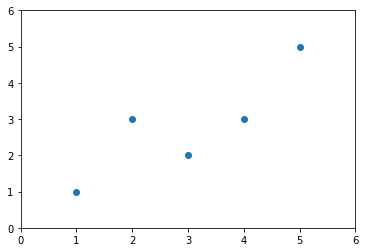

In [3]:
plt.scatter(x, y)
plt.axis([0, 6, 0, 6])
plt.show()

In [4]:
x_mean = np.mean(x)
y_mean = np.mean(y)

Для вычисления коэффициента $a$ прямой $y=a\,x+b$ нужно вычислить  выборочную корреляцию переменных $x$ и $y$ и выборочную дисперсию переменной (признака) $x$. 

In [5]:
num = 0.0
d = 0.0
for x_i, y_i in zip(x, y):
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean) ** 2

In [6]:
a = num/d
b = y_mean - a * x_mean
y_hat = a * x + b

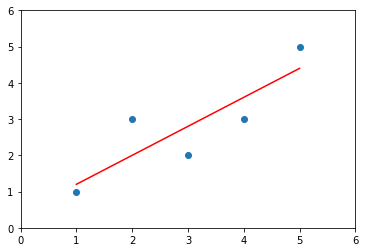

In [7]:
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')
plt.axis([0, 6, 0, 6])
plt.show()

Построенная таким образом функция позволяет прогнозировать значение $y$ по $x$:

In [8]:
x_predict = 6
y_predict = a * x_predict + b
y_predict

5.2

Объединим программный код в следующий класс `SimpleLinearRegression1`:

In [9]:
class SimpleLinearRegression1:

    def __init__(self):
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        assert x_train.ndim == 1, \
            "Simple Linear Regressor can only solve single feature training data."
        assert len(x_train) == len(y_train), \
            "the size of x_train must be equal to the size of y_train"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        num = 0.0
        d = 0.0
        for x, y in zip(x_train, y_train):
            num += (x - x_mean) * (y - y_mean)
            d += (x - x_mean) ** 2

        self.a_ = num / d
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        assert x_predict.ndim == 1, \
            "Simple Linear Regressor can only solve single feature training data."
        assert self.a_ is not None and self.b_ is not None, \
            "must fit before predict!"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearRegression1()"

Теперь можно создавать объекты этого класса при помощи конструктора и применять к объектам методы класса:

In [10]:
reg1 = SimpleLinearRegression1()
reg1.fit(x, y)
reg1.predict(np.array([x_predict]))

array([5.2])

In [11]:
reg1.a_, reg1.b_

(0.8, 0.39999999999999947)

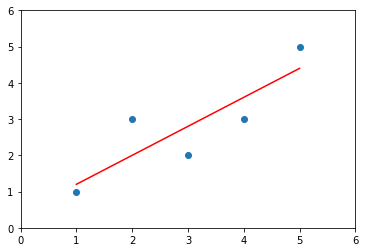

In [12]:
y_hat1 = reg1.predict(x)

plt.scatter(x, y)
plt.plot(x, y_hat1, color='r')
plt.axis([0, 6, 0, 6])
plt.show()

Рассмотрим также альтернативную реализацию регрессии в классе `SimpleLinearRegression2`:

In [13]:
#Improved, the for loop is realized by vectorization to increase efficiency
class SimpleLinearRegression2:
    def __init__(self):
        self.a_=None
        self.b_=None
 
    def fit(self,x_train,y_train):
        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)
        # up = np.dot((x_train-x_mean),(y_train-y_mean))
        # down =np.dot((x_train-x_mean),(x_train-x_mean))
        up = np.sum((x_train - x_mean)*(y_train - y_mean))
        down = np.sum((x_train - x_mean)*(x_train - x_mean))
        self.a_ = up / down
        self.b_ = y_mean - self.a_ * x_mean
        return self
 
    def _predict(self,x_single):
        return x_single*self.a_+self.b_
    def predict(self,x_predict):
        return np.array([self._predict(x) for x in x_predict])

In [14]:
reg2 = SimpleLinearRegression2()
reg2.fit(x, y)
reg2.predict(np.array([x_predict]))

array([5.2])

In [15]:
reg2.a_, reg2.b_

(0.8, 0.39999999999999947)

In [16]:
m = 1000000
big_x = np.random.random(size=m)
big_y = big_x * 2 + 3 + np.random.normal(size=m)
%timeit reg1.fit(big_x, big_y)
%timeit reg2.fit(big_x, big_y)

1.37 s ± 33.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
21.2 ms ± 1.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
reg1.a_, reg1.b_

(1.9984058135614322, 3.0012443824576143)

In [18]:
reg2.a_, reg2.b_

(1.9984058135613036, 3.0012443824576787)

## Метрики регрессии

In [19]:
import warnings
warnings.simplefilter("ignore")

from sklearn import datasets
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [20]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [21]:
x = boston.data[:,5] 
y = boston.target
x.shape, y.shape

((506,), (506,))

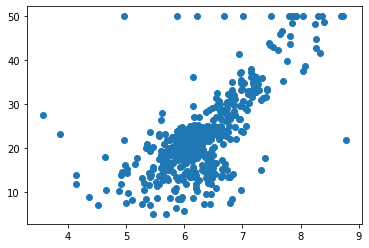

In [22]:
plt.scatter(x, y)
plt.show()

Очистим набор от точек, расположенных вдоль верхней границы графика.

In [23]:
np.max(y)

50.0

In [24]:
x = x[y < 50.0]
y = y[y < 50.0]
x.shape, y.shape

((490,), (490,))

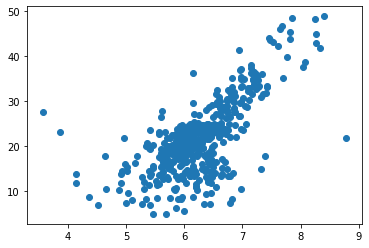

In [25]:
plt.scatter(x, y)
plt.show()

Будем пользовать следующей версией функции `train_test_split`:

In [26]:
def train_test_split(X, y, test_ratio=0.2, seed=None):
    
    assert X.shape[0] == y.shape[0], \
        "the size of X must be equal to the size of y"
    assert 0.0 <= test_ratio <= 1.0, \
        "test_ration must be valid"

    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))

    test_size = int(len(X) * test_ratio)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((392,), (98,), (392,), (98,))

Будем использовать новую версию класса для регрессии:

In [28]:
class SimpleLinearRegression:

    def __init__(self):
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        assert x_train.ndim == 1, \
            "Simple Linear Regressor can only solve single feature training data."
        assert len(x_train) == len(y_train), \
            "the size of x_train must be equal to the size of y_train"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        self.a_ = (x_train - x_mean).dot(y_train - y_mean) / (x_train - x_mean).dot(x_train - x_mean)
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        assert x_predict.ndim == 1, \
            "Simple Linear Regressor can only solve single feature training data."
        assert self.a_ is not None and self.b_ is not None, \
            "must fit before predict!"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearRegression()"

In [29]:
reg = SimpleLinearRegression()
reg.fit(x_train, y_train)

SimpleLinearRegression()

In [30]:
reg.a_, reg.b_

(7.8608543562689555, -27.459342806705543)

Изобразим на графике точки обучающего набора и линию регрессии:

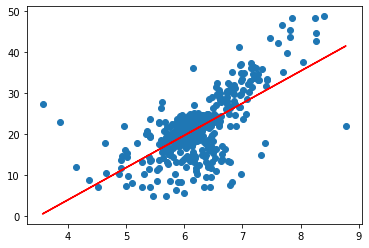

In [31]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

А теперь добавим также точки тестового набора другим цветом:

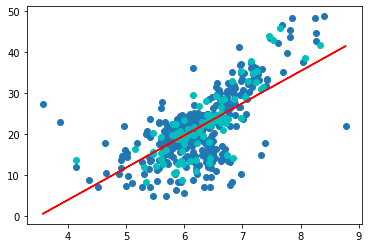

In [32]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color="c")
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

In [33]:
y_predict = reg.predict(x_test)

### Среднее квадратичное отклонение MSE

Средняя квадратичная ошибка (Mean Squared Error, MSE)
применяется в ситуациях, когда нам надо подчеркнуть большие ошибки и выбрать модель, которая дает меньше больших ошибок прогноза. 

$MSE=\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}$

Грубые ошибки становятся заметнее за счет того, что ошибку прогноза мы возводим в квадрат. И про модель, которая дает нам меньшее значение среднеквадратической ошибки, можно сказать, что что у этой модели меньше грубых ошибок.

In [34]:
mse_test = np.sum((y_predict - y_test)**2) / len(y_test)
mse_test

24.156602134387438

### Корень из средней квадратичной ошибки RMSE

Корень из средней квадратичной ошибки (Root Mean Squared Error, RMSE)
получается из MSE путем извлечения корня.

$RMSE=\sqrt{\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}}$

Каждое отклонение возводится в квадрат, любое небольшое отклонение может значительно повлиять на показатель ошибки. 

In [35]:
from math import sqrt

rmse_test = sqrt(mse_test)
rmse_test

4.914936635846635

### Cредняя абсолютная ошибка MAE

Cредняя абсолютная ошибка (Mean Absolute Error, MAE) не так сильно  штрафует за большие отклонения по сравнению со среднеквадратичным, и поэтому менее чувствительна к выбросам.

$MAE=\frac{1}{n}\sum_{i=1}^{n}\left|y_{i}-\hat{y}_{i}\right|$

In [36]:
mae_test = np.sum(np.absolute(y_predict - y_test))/len(y_test)
mae_test

3.5430974409463873

Показатели MSE и MAE определены в scikit-learn:

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [38]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [39]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

### Коэффициент детерминации $R^2$

Коэффициент детерминации $R^2$ измеряет долю дисперсии, объясненную моделью, в общей дисперсии целевой переменной. 

$R^{2}=1-\frac{Q}{S_{0}}, Q=\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}, S_{0}=\sum_{i=1}^{n}\left(y-\bar{y}\right)^{2}$,

где $\bar{y}$ – это выборочное среднее зависимой переменной $y$. Фактически, данная мера качества — это нормированная среднеквадратичная ошибка. Если она близка к единице, то модель хорошо объясняет данные, если же она близка к нулю, то прогнозы сопоставимы по качеству с константным предсказанием.

In [40]:
1 - mean_squared_error(y_test, y_predict)/np.var(y_test)

0.6129316803937322

In [41]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

0.6129316803937324

### Линейная регрессия в scikit-learn

Для использования линейной регрессии в scikit-learn можно воспользоваться классом `LinearRegression`:

In [42]:
boston = datasets.load_boston()

X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, seed=666)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((392,), (98,), (392,), (98,))

In [44]:
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]
X_train.shape, X_test.shape

((392, 1), (98, 1))

In [45]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
lin_reg.coef_

array([7.86085436])

In [47]:
lin_reg.intercept_

-27.45934280670553

Метод `score()` возвращает коэффициент детерминации $R^2$:

In [48]:
lin_reg.score(X_test, y_test)

0.6129316803937322

### Подбор параметров регрессии

Для подбора наилучших параметров регрессии можно использовать класс `GridSearchCV` из библиотеки `scikit-learn`. `GridSearchCV` находит наилучшие параметры путем обычного перебора: он создает модель для каждой возможной комбинации параметров, поэтому такой подход может быть весьма затратным по ресурсам.

Рассмотрим в качестве примера регрессор на основе метода ближайших соседей.

In [49]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train, y_train)
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

С параметрами регрессора по умолчанию получаем следующий результат:

In [50]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train_standard, y_train)
knn_reg.score(X_test_standard, y_test)

0.583388555134235

Воспользуемся `GridSearchCV`:

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        "weights": ["uniform"],
        "n_neighbors": [i for i in range(1, 11)]
    },
    {
        "weights": ["distance"],
        "n_neighbors": [i for i in range(1, 11)],
        "p": [i for i in range(1,6)]
    }
]

knn_reg = KNeighborsRegressor()
grid_search = GridSearchCV(knn_reg, param_grid, n_jobs=-1, verbose=1)
grid_search.fit(X_train_standard, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

Параметры лучшего регрессора находятся в свойстве `best_params_`:

In [52]:
grid_search.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

Средний показатель качества лучшего регрессора:

In [53]:
grid_search.best_score_

0.44996851399278875

На нашем тестовом наборе лучший регрессор имеет показатель качества: 

In [54]:
grid_search.best_estimator_.score(X_test_standard, y_test)

0.6477415833873351

### Моделирование градиентного спуска

Градиентный спуск — метод нахождения локального минимума или максимума функции с помощью движения вдоль градиента. 

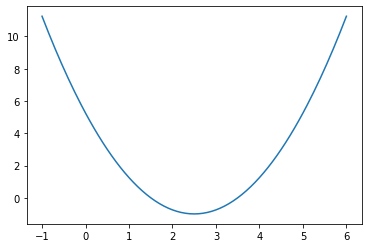

In [55]:
plot_x = np.linspace(-1., 6., 141)
plot_y = (plot_x-2.5)**2 - 1.
plt.plot(plot_x, plot_y)
plt.show()

Задаем точность и шаг градиентного спуска:

In [56]:
epsilon = 1e-8
eta = 0.1

In [57]:
def J(theta):
    return (theta-2.5)**2 - 1.

def dJ(theta):
    return 2*(theta-2.5)

theta = 0.0
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient
    
    if(abs(J(theta) - J(last_theta)) < epsilon):
        break
    
print(theta)
print(J(theta))

2.499891109642585
-0.99999998814289


Запомним и визуализируем значения $\theta$:

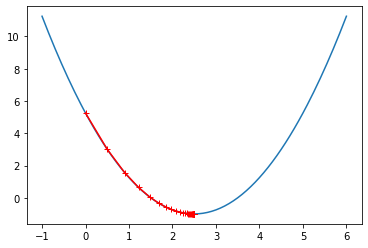

In [58]:
theta = 0.0
theta_history = [theta]
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient
    theta_history.append(theta)
    
    if(abs(J(theta) - J(last_theta)) < epsilon):
        break

plt.plot(plot_x, J(plot_x))
plt.plot(np.array(theta_history), J(np.array(theta_history)), color="r", marker='+')
plt.show()

In [59]:
len(theta_history)

46

Будем использовать следующие функции:

In [60]:
theta_history = []

def gradient_descent(initial_theta, eta, epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)

    while True:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)
    
        if(abs(J(theta) - J(last_theta)) < epsilon):
            break
            
def plot_theta_history():
    plt.plot(plot_x, J(plot_x))
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color="r", marker='+')
    plt.show()

Проведем моделирование градиентного спуска с различными параметрами:

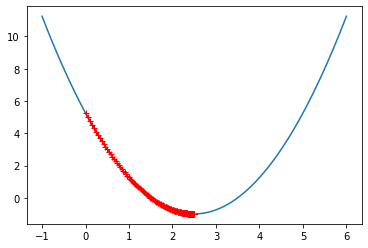

In [61]:
eta = 0.01
theta_history = []
gradient_descent(0, eta)
plot_theta_history()

In [62]:
len(theta_history)

424

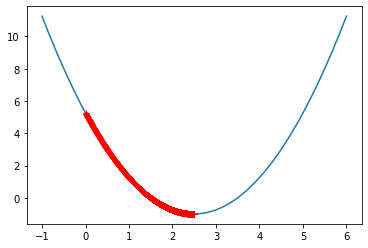

In [63]:
eta = 0.001
theta_history = []
gradient_descent(0, eta)
plot_theta_history()

In [64]:
len(theta_history)

3682

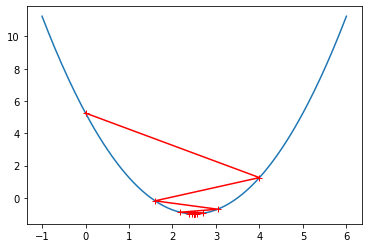

In [65]:
eta = 0.8
theta_history = []
gradient_descent(0, eta)
plot_theta_history()

In [66]:
len(theta_history)

22

При таком выборе шага градиентного спуска будет возникать ошибка (исключение):

eta = 1.1
theta_history = []
gradient_descent(0, eta)

Поэтому переопределим функции `J()` и `gradient_descent()`.

In [68]:
def J(theta):
    try:
        return (theta-2.5)**2 - 1.
    except:
        return float('inf')

In [69]:
def gradient_descent(initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    
    theta = initial_theta
    i_iter = 0
    theta_history.append(initial_theta)

    while i_iter < n_iters:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)
    
        if(abs(J(theta) - J(last_theta)) < epsilon):
            break
            
        i_iter += 1
        
    return

In [70]:
eta = 1.1
theta_history = []
gradient_descent(0, eta)

In [71]:
len(theta_history)

10001

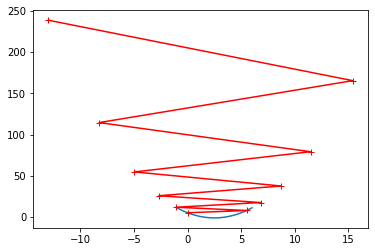

In [72]:
eta = 1.1
theta_history = []
gradient_descent(0, eta, n_iters=10)
plot_theta_history()

### Градиентный спуск в линейной регрессии

In [73]:
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)
x.shape

(100,)

In [74]:
X = x.reshape(-1, 1)
X.shape

(100, 1)

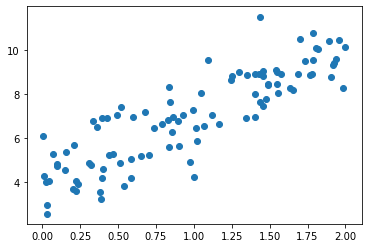

In [75]:
plt.scatter(x, y)
plt.show()

In [76]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

In [77]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2 / len(X_b)

In [78]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    
    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        cur_iter += 1

    return theta

In [79]:
X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1,1)])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

In [80]:
theta

array([4.02145786, 3.00706277])

Определим класс `LinearRegression`, в котором метод `fit_gd()` будет использовать градиентный спуск: 

In [81]:
class LinearRegression:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        self._theta = None

    def fit_normal(self, X_train, y_train):
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"

        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        self._theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]

        return self

    def fit_gd(self, X_train, y_train, eta=0.01, n_iters=1e4):
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"

        def J(theta, X_b, y):
            try:
                return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
            except:
                return float('inf')

        def dJ(theta, X_b, y):
            res = np.empty(len(theta))
            res[0] = np.sum(X_b.dot(theta) - y)
            for i in range(1, len(theta)):
                res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
            return res * 2 / len(X_b)

        def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

            theta = initial_theta
            cur_iter = 0

            while cur_iter < n_iters:
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                theta = theta - eta * gradient
                if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
                    break

                cur_iter += 1

            return theta

        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.zeros(X_b.shape[1])
        self._theta = gradient_descent(X_b, y_train, initial_theta, eta, n_iters)

        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]

        return self

    def predict(self, X_predict):
        assert self.intercept_ is not None and self.coef_ is not None, \
            "must fit before predict!"
        assert X_predict.shape[1] == len(self.coef_), \
            "the feature number of X_predict must be equal to X_train"

        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return X_b.dot(self._theta)

    def score(self, X_test, y_test):
        y_predict = self.predict(X_test)
        return r2_score(y_test, y_predict)

    def __repr__(self):
        return "LinearRegression()"

In [82]:
lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [83]:
lin_reg.coef_

array([3.00706277])

In [84]:
lin_reg.intercept_

4.021457858204859

### Сравнение методов обучения линейной регрессии

In [85]:
lin_reg1 = LinearRegression()
%time lin_reg1.fit_normal(X_train, y_train)
lin_reg1.score(X_test, y_test)

Wall time: 0 ns


0.6129316803937171

Если запускаем второй метод (с градиентным спуском), то может возникнуть ошибка.

In [86]:
lin_reg2 = LinearRegression()
lin_reg2.fit_gd(X_train, y_train)

LinearRegression()

In [87]:
lin_reg2.coef_

array([7.33989893])

Поэтому изменим значение параметра `eta`, установленное по умолчанию:

In [88]:
lin_reg2.fit_gd(X_train, y_train, eta=0.000001)
lin_reg2.score(X_test, y_test)

-1.3729869442590732

In [89]:
%time lin_reg2.fit_gd(X_train, y_train, eta=0.000001, n_iters=1e5)

Wall time: 3.85 s


LinearRegression()

In [90]:
lin_reg2.score(X_test, y_test)

0.3636023300678124

In [91]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_standard = standardScaler.transform(X_train)

lin_reg3 = LinearRegression()
%time lin_reg3.fit_gd(X_train_standard, y_train)

Wall time: 26 ms


LinearRegression()

In [92]:
X_test_standard = standardScaler.transform(X_test)
lin_reg3.score(X_test_standard, y_test)

0.6129268423538078

In [93]:
m = 1000
n = 1000

big_X = np.random.normal(size=(m, n))

true_theta = np.random.uniform(0.0, 100.0, size=n+1)

big_y = big_X.dot(true_theta[1:]) + true_theta[0] + np.random.normal(0., 10., size=m)

In [94]:
big_reg1 = LinearRegression()
%time big_reg1.fit_normal(big_X, big_y)

Wall time: 151 ms


LinearRegression()

Работу второго метода придется прервать из-за долгой работы:

big_reg2 = LinearRegression()
%time big_reg2.fit_gd(big_X, big_y)

### Стохастический градиентный спуск

Стохастический градиентный спуск (stochastic gradient descent, SGD) − оптимизационный алгоритм, отличающийся от обычного градиентного спуска тем, что градиент оптимизируемой функции считается на каждом шаге не как сумма градиентов от каждого элемента выборки, а как градиент от одного, случайно выбранного элемента или некоторой подвыборки.

In [96]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1,1)
y = 4.*x + 3. + np.random.normal(0, 3, size=m)

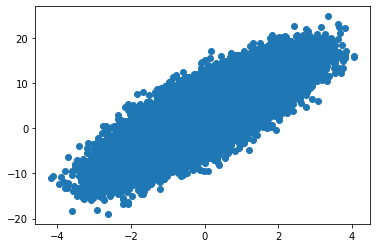

In [97]:
plt.scatter(x, y)
plt.show()

In [98]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)

Wall time: 540 ms


In [99]:
theta

array([3.0008122 , 3.98844293])

In [100]:
def dJ_sgd(theta, X_b_i, y_i):
    return 2 * X_b_i.T.dot(X_b_i.dot(theta) - y_i)

def sgd(X_b, y, initial_theta, n_iters):

    t0, t1 = 5, 50
    def learning_rate(t):
        return t0 / (t + t1)

    theta = initial_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient

    return theta

In [101]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta, n_iters=m//3)

Wall time: 752 ms


In [102]:
theta

array([2.97388289, 3.94473746])

### Стохастический градиентный спуск в scikit-learn

In [103]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1,1)
y = 4.*x + 3. + np.random.normal(0, 3, size=m)

Определим новую версию класса `LinearRegression`, включающую и стохастический градиентный спуск:

In [104]:
class LinearRegression:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        self._theta = None

    def fit_normal(self, X_train, y_train):
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"

        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        self._theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]

        return self

    def fit_bgd(self, X_train, y_train, eta=0.01, n_iters=1e4):
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"

        def J(theta, X_b, y):
            try:
                return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
            except:
                return float('inf')

        def dJ(theta, X_b, y):
            return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

        def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

            theta = initial_theta
            cur_iter = 0

            while cur_iter < n_iters:
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                theta = theta - eta * gradient
                if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
                    break

                cur_iter += 1

            return theta

        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.zeros(X_b.shape[1])
        self._theta = gradient_descent(X_b, y_train, initial_theta, eta, n_iters)

        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]

        return self

    def fit_sgd(self, X_train, y_train, n_iters=50, t0=5, t1=50):
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"
        assert n_iters >= 1

        def dJ_sgd(theta, X_b_i, y_i):
            return X_b_i * (X_b_i.dot(theta) - y_i) * 2.

        def sgd(X_b, y, initial_theta, n_iters=5, t0=5, t1=50):

            def learning_rate(t):
                return t0 / (t + t1)

            theta = initial_theta
            m = len(X_b)
            for i_iter in range(n_iters):
                indexes = np.random.permutation(m)
                X_b_new = X_b[indexes,:]
                y_new = y[indexes]
                for i in range(m):
                    gradient = dJ_sgd(theta, X_b_new[i], y_new[i])
                    theta = theta - learning_rate(i_iter * m + i) * gradient

            return theta

        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.random.randn(X_b.shape[1])
        self._theta = sgd(X_b, y_train, initial_theta, n_iters, t0, t1)

        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]

        return self

    def predict(self, X_predict):
        assert self.intercept_ is not None and self.coef_ is not None, \
            "must fit before predict!"
        assert X_predict.shape[1] == len(self.coef_), \
            "the feature number of X_predict must be equal to X_train"

        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return X_b.dot(self._theta)

    def score(self, X_test, y_test):
        y_predict = self.predict(X_test)
        return r2_score(y_test, y_predict)

    def __repr__(self):
        return "LinearRegression()"

In [105]:
lin_reg = LinearRegression()
lin_reg.fit_bgd(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

2.995168757556878 [3.99851563]


In [106]:
lin_reg = LinearRegression()
lin_reg.fit_sgd(X, y, n_iters=2)
print(lin_reg.intercept_, lin_reg.coef_)

3.0043906780760827 [3.9859709]


Используем стохастический градиентный спуск наборе данных из sklearn:

In [108]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [110]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

In [111]:
lin_reg = LinearRegression()
%time lin_reg.fit_sgd(X_train_standard, y_train, n_iters=2)
lin_reg.score(X_test_standard, y_test)

Wall time: 8.04 ms


0.7857275413602652

In [112]:
%time lin_reg.fit_sgd(X_train_standard, y_train, n_iters=50)
lin_reg.score(X_test_standard, y_test)

Wall time: 104 ms


0.808560757055621

In [113]:
%time lin_reg.fit_sgd(X_train_standard, y_train, n_iters=100)
lin_reg.score(X_test_standard, y_test)

Wall time: 194 ms


0.8129434245278827

В scikit-learn имеется реализация регрессора на базе стохастического градиентного спуска:

In [114]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()
%time sgd_reg.fit(X_train_standard, y_train)
sgd_reg.score(X_test_standard, y_test)

Wall time: 2.53 ms


0.8122443512755939

In [115]:
sgd_reg = SGDRegressor(max_iter=5000000)
%time sgd_reg.fit(X_train_standard, y_train)
sgd_reg.score(X_test_standard, y_test)

Wall time: 2.07 ms


0.8126587445206522

### Полиномиальная регрессия

Полиномиальная регрессия может использоваться для регрессии нелинейных данных. В полиномиальной регрессии проводится кривая линия, соответствующая полиному степени больше 1.

In [116]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

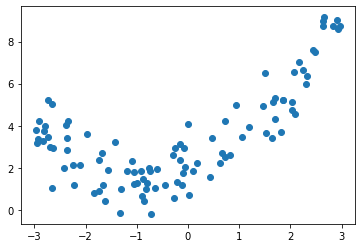

In [117]:
plt.scatter(x, y)
plt.show()

In [118]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)

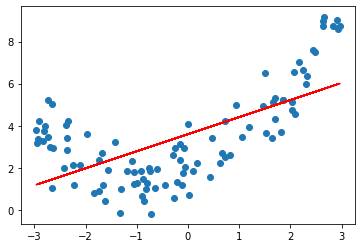

In [119]:
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')
plt.show()

In [120]:
X2 = np.hstack([X, X**2])
X2.shape

(100, 2)

In [121]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

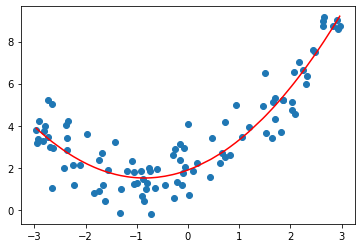

In [122]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [123]:
lin_reg2.coef_

array([0.89870689, 0.52941731])

In [124]:
lin_reg2.intercept_

1.8980654546182865

### Конвейер (Pipeline) в задаче регрессии 

In [125]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [126]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)
X2.shape

(100, 3)

In [127]:
X[:5,:]

array([[-2.23498116],
       [ 1.39609955],
       [ 0.06162776],
       [ 1.2813222 ],
       [-1.56223624]])

In [128]:
X2[:5,:]

array([[ 1.00000000e+00, -2.23498116e+00,  4.99514078e+00],
       [ 1.00000000e+00,  1.39609955e+00,  1.94909397e+00],
       [ 1.00000000e+00,  6.16277609e-02,  3.79798092e-03],
       [ 1.00000000e+00,  1.28132220e+00,  1.64178657e+00],
       [ 1.00000000e+00, -1.56223624e+00,  2.44058207e+00]])

In [129]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

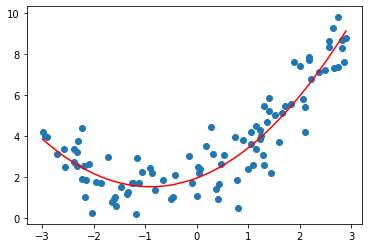

In [130]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [131]:
lin_reg2.coef_

array([0.        , 0.94592982, 0.52546352])

In [132]:
lin_reg2.intercept_

1.9650851087423562

Класс `PolynomialFeatures` позволяет строить наборы данных, содержащий полиномиальные зависимости от исходных данных:

In [133]:
X = np.arange(1, 11).reshape(-1, 2)
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [134]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

### Построение конвейера (Pipeline)

In [135]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [136]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

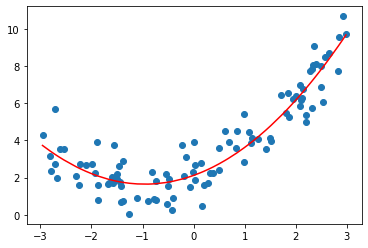

In [137]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

### Переобучение и недообучение

Переобучение (overfitting) — это ситуация, когда алгоритм обучения вырабатывает предсказания, которые слишком близко или точно соответствуют конкретному набору данных и не подходят для применения к другим данным или будущим наблюдениям.

Недообучение (underfitting) — это ситуация, когда алгоритм обучения не обеспечивает достаточно малой величины средней ошибки на обучающей выборке. Недообучение возникает при использовании недостаточно сложных моделей.

In [138]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

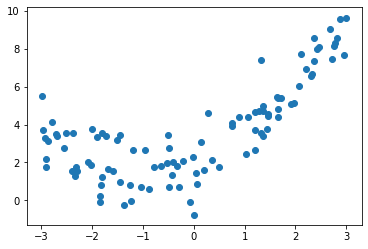

In [139]:
plt.scatter(x, y)
plt.show()

In [140]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.4953707811865009

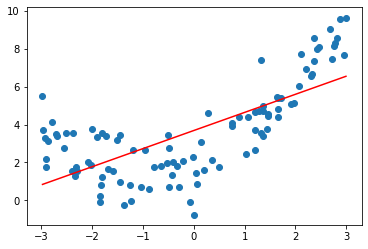

In [141]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

In [142]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.0750025765636577

In [143]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [144]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [145]:
y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

1.0987392142417856

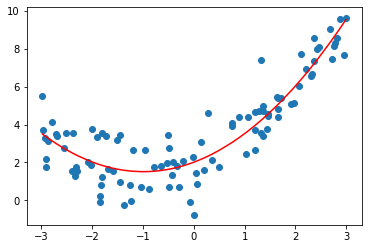

In [146]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

In [147]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)

y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

1.0508466763764202

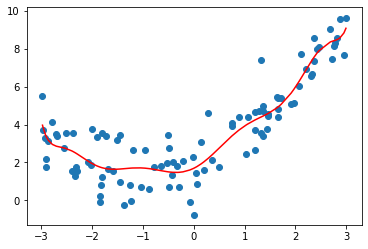

In [148]:
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

In [149]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.6870911922673567

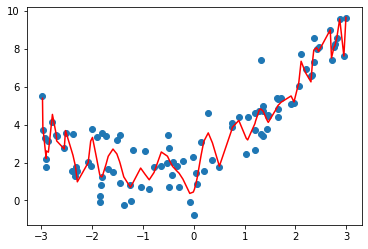

In [150]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

In [151]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

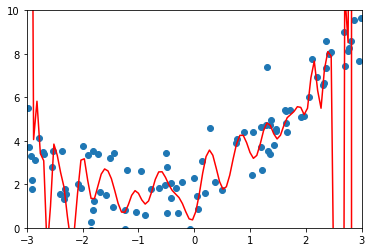

In [152]:
plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 10])
plt.show()

### Обучающая и тестовые выборки

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [154]:
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

2.2199965269396573

In [155]:
poly2_reg.fit(X_train, y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.8035641056297901

In [156]:
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

0.9212930722150697

In [157]:
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)

14075780347.739939

### Кривые обучения

Кривые обучения — это графическое представление зависимости меры (показателя) качества обучения (по вертикальной оси) от определенного показателя модели обучения (по горизонтальной оси). 

In [158]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

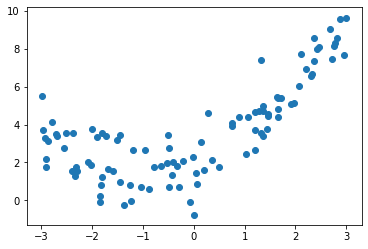

In [159]:
plt.scatter(x, y)
plt.show()

In [160]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
X_train.shape, X_test.shape

((75, 1), (25, 1))

Будем визуализировать в качестве качества модели показатели `RMSE` для части обучающей выборки и тестовой выборки в зависимости от количества точек в обучающей выборке. 

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_score = []
test_score = []
for i in range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

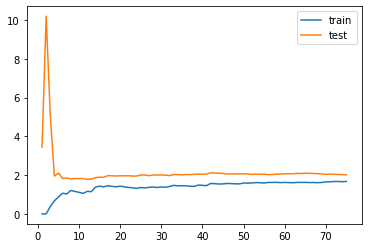

In [162]:
plt.plot([i for i in range(1, 76)], np.sqrt(train_score), label="train")
plt.plot([i for i in range(1, 76)], np.sqrt(test_score), label="test")
plt.legend()
plt.show()

In [163]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(test_score), label="test")
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 4]) # np.sqrt(test_score).max()
    plt.show()


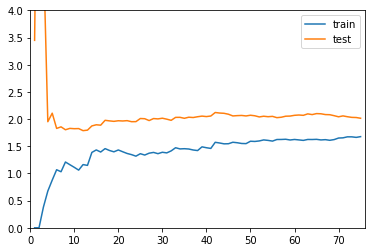

In [164]:
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

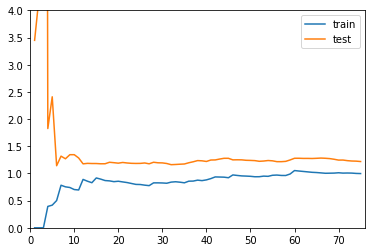

In [165]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

poly2_reg = PolynomialRegression(degree=2)
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

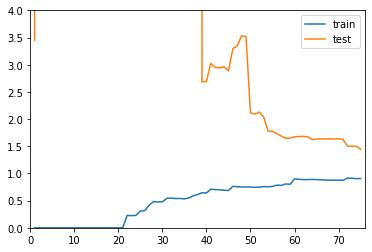

In [166]:
poly20_reg = PolynomialRegression(degree=20)
plot_learning_curve(poly20_reg, X_train, X_test, y_train, y_test)

### Регуляризация линейной регрессии

#### Переобучение линейной регрессии

In [167]:
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

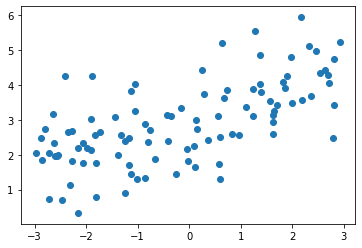

In [168]:
plt.scatter(x, y)
plt.show()

In [169]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [170]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [171]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

167.9401085999025

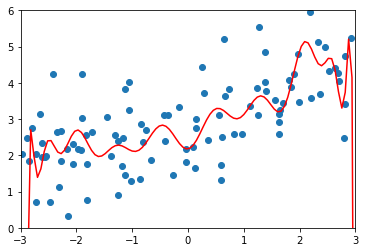

In [172]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 6])
plt.show()

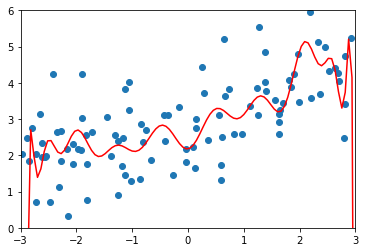

In [173]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

plot_model(poly_reg)

#### Гребневая регрессия

Гребневая регрессия (ridge regression) – это регрессия, в которой используется функция потерь

$Q\left(\beta\right)=\sum_{i=1}^{n}\mathcal{L}\left(y_{i},g\left(x_{i},\beta\right)\right)+\alpha\sum_{j=1}^{d}\beta_{j}^{2}$

Использование гребневой регрессии позволяет избежать переобучения.

In [174]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])

In [175]:
ridge1_reg = RidgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.3233492754136291

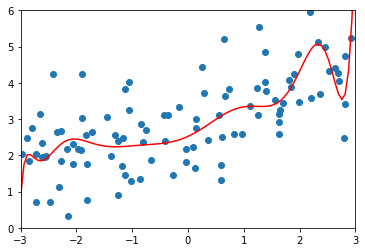

In [176]:
plot_model(ridge1_reg)

In [177]:
ridge2_reg = RidgeRegression(20, 1)
ridge2_reg.fit(X_train, y_train)

y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.1888759304218461

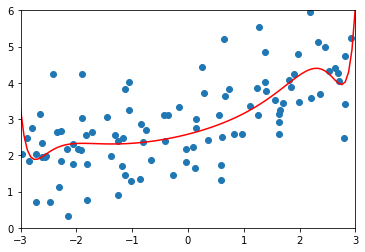

In [178]:
plot_model(ridge2_reg)

In [179]:
ridge3_reg = RidgeRegression(20, 100)
ridge3_reg.fit(X_train, y_train)

y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.3196456113086197

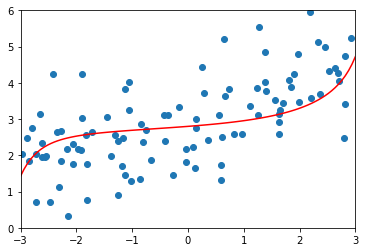

In [180]:
plot_model(ridge3_reg)

In [181]:
ridge4_reg = RidgeRegression(20, 10000000)
ridge4_reg.fit(X_train, y_train)

y4_predict = ridge4_reg.predict(X_test)
mean_squared_error(y_test, y4_predict)

1.8408455590998372

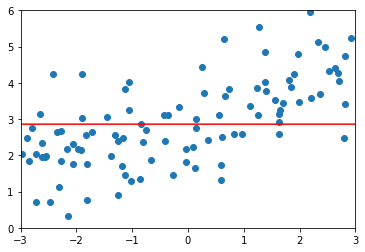

In [182]:
plot_model(ridge4_reg)

#### Регрессия лассо (LASSO)

В регрессии лассо (LASSO, Least Absolute Shrinkage and Selection Operator) используется регуляризация через манхэттенское расстояние:

$Q\left(\beta\right)=\sum_{i=1}^{n}\mathcal{L}\left(y_{i},g\left(x_{i},\beta\right)\right)+\alpha\sum_{j=1}^{d}\left|\beta_{j}\right|$

In [183]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha))
    ])

In [184]:
lasso1_reg = LassoRegression(20, 0.01)
lasso1_reg.fit(X_train, y_train)

y1_predict = lasso1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.149608084325997

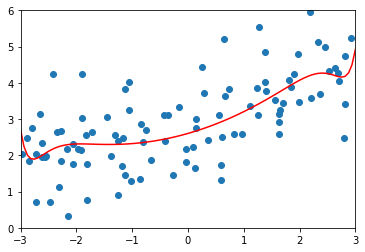

In [185]:
plot_model(lasso1_reg)

In [200]:
lasso2_reg = LassoRegression(20, 0.1)
lasso2_reg.fit(X_train, y_train)

lasso2_reg.score(X_test, y_test)
#y2_predict = lasso2_reg.predict(X_test)
#mean_squared_error(y_test, y2_predict)

0.3774463107290503

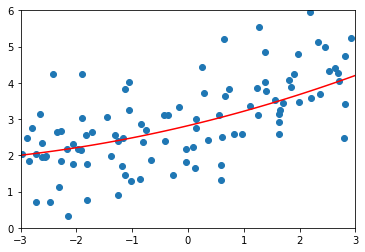

In [187]:
plot_model(lasso2_reg)

In [188]:
lasso3_reg = LassoRegression(20, 1)
lasso3_reg.fit(X_train, y_train)

y3_predict = lasso3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.8408939659515595

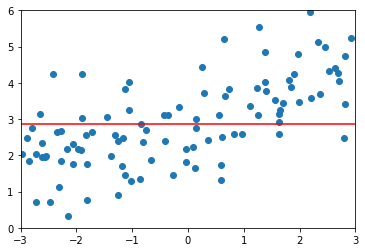

In [189]:
plot_model(lasso3_reg)

#### Регрессия эластичная сеть (elastic net)

В регрессии эластичная сеть (elastic net) используется регуляризация:

$Q\left(\beta\right)=\sum_{i=1}^{n}\mathcal{L}\left(y_{i},g\left(x_{i},\beta\right)\right)+\alpha_{1}\sum_{j=1}^{d}\left|\beta_{j}\right|+\alpha_{2}\sum_{j=1}^{d}\beta_{j}^{2}$

In [190]:
from sklearn.linear_model import ElasticNet

def ElNetRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("elnet_reg", ElasticNet(alpha=alpha))
    ])

В конструкторе класса `ElasticNet` также имеется параметр `l1_ratio`, по умолчанию равный 0.5. Если `l1_ratio = 0` то штраф как в гребневой регрессии ($L_2$). Если `l1_ratio = 1`, то штраф как в регрессии лассо ($L_1$). Если `0 < l1_ratio < 1`, то штраф представляет собой комбинацию ($L_1$) и ($L_2$).

In [191]:
elnet1_reg = ElNetRegression(20, 0.01)
elnet1_reg.fit(X_train, y_train)

y1_predict = elnet1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.1851178078827131

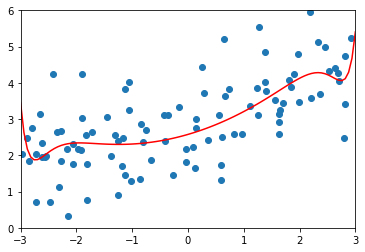

In [192]:
plot_model(elnet1_reg)

#### Регрессия при помощи деревьев решений

Деревья решений могут быть использованы не только для решения задачи классификации, но и для решения задачи регрессии.

In [193]:
from sklearn.tree import DecisionTreeRegressor

def TreeRegression(max_leaf_nodes=None):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("tree_reg", DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes))
    ])

In [194]:
tree1_reg = TreeRegression(4)
tree1_reg.fit(X_train, y_train)

y1_predict = tree1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.1964394324767087

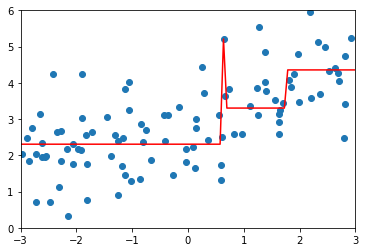

In [195]:
plot_model(tree1_reg)

#### Регрессия при помощи SVM

Для задачи регрессии может также быть использован метод опорных векторов (Support Vector Machines, SVM).

In [196]:
from sklearn.svm import SVR

def SVMRegression(degree):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svm_reg", SVR(kernel='poly',degree=degree))
    ])

In [201]:
svm1_reg = SVMRegression(5)
svm1_reg.fit(X_train, y_train)

svm1_reg.score(X_test, y_test)
#y1_predict = svm1_reg.predict(X_test)
#mean_squared_error(y_test, y1_predict)

0.21935157276830872

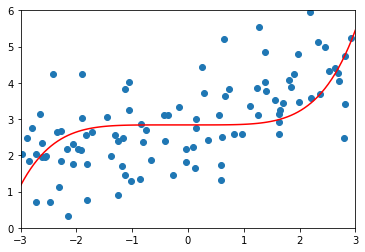

In [198]:
plot_model(svm1_reg)

### Задание на лабораторную работу №8

#### Задание (10 баллов)

Для закрепленного за Вами варианта лабораторной работы:

1.	Считайте заданный набор данных из репозитария UCI (независимую и зависимую переменные). 

2.	Если в столбцах для независимой или зависимой переменных имеются пропущенные значения, то удалите записи с пропущенными значениями. 

3.	Масштабируйте независимую и зависимую переменную на диапазон от 0 до 1 и визуализируйте набор данных на плоскости (ось абсцисс - независимая переменная, ось ординат - зависимая переменная).

4.  Разбейте набор данных на обучающую и тестовую выборки.

5.	Постройте регресоры на базе следующих моделей регрессии:
  * линейной регрессии (LinearRegression)
  * полиномиальной регрессии (PolynomialFeatures+LinearRegression)
  * стохастического градиентного спуска (SGDRegressor)
  * гребневой регрессии (Ridge)
  * лассо регрессии (Lasso)
  * регрессии эластичная сеть (ElasticNet)
  * регрессии на основе метода ближайших соседей (KNeighborsRegressor)
  * регрессии на основе деревьев решений (DecisionTreeRegressor)
  * регрессии на основе метода опорных векторов (SVR)

6. При помощи GridSearch определите оптимальные параметры регрессоров (кроме LinearRegression).

7. Визуализируйте на плоскости точки тестовой выборки и графики различных моделей регрессий разными цветами. Подпишите оси и создайте легенду и заголовок для графиков.

8. 	Определите лучший регрессор по показателю коэффициент детерминации. 

9.  Для лучшего регрессора визуализируйте кривые обучения (в зависимости от количества точек в обучающей выборке).
